# Postprocessing of output data

Notebook used to build and test all postprocess functions for the script `postprocessing.py`.

In [1]:
import numpy as np
import xarray as xr; xr.set_options(display_style='html', keep_attrs=True)
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys; sys.path.append("..")
from dataset_manipulation.postprocess import *

**NOTE**: If you then copy this to NIRD remember to change the path of the input files and the libraries

In [2]:
# Path to import and export
raw_path = '../../../archive/' #Betzy: /cluster/home/adelez/nird/ #Nird: /nird/home/adelez/storage/
processed_path = '../../processed-data/postprocessing/'

# Case
casename = 'IDEAL-ON_2000_sec_nudg_f19_f19'
casealias = 'IDEAL-ON'

"""
casename = 'IDEAL-OFF_2000_sec_nudg_f19_f19'
casealias = 'IDEAL-OFF'

casename = 'REAL-ON_2000_sec_nudg_f19_f19'
casealias = 'REAL-ON'

casename = 'REAL-OFF_2000_sec_nudg_f19_f19'
casealias = 'REAL-OFF'"""

# Component

comp = 'atm'
#comp = 'lnd'

In [3]:
comp ='lnd'

In [5]:
# Have a look to the variables:
"""
if comp=='atm': model='cam'
elif comp=='lnd': model='clm2'
fp = raw_path+casename+'/'+comp+'/hist/'+casename+'.'+model+'.h0.2007-01.nc'
all_files = glob.glob(fp)
all_files.sort()
print("Files found")
ds0 = xr.open_mfdataset(all_files)
print("Dataset created")
ds0
"""

Files found
Dataset created


<xarray.Dataset>
Dimensions:                  (cft: 64, glc_nec: 10, hist_interval: 2, lat: 96, levdcmp: 25, levgrnd: 25, levlak: 10, levsoi: 20, lon: 144, ltype: 9, natpft: 15, nvegwcs: 4, time: 1)
Coordinates:
  * levgrnd                  (levgrnd) float64 0.01 0.04 0.09 ... 28.87 42.0
  * levlak                   (levlak) float64 0.05 0.6 2.1 ... 25.6 34.33 44.77
  * levdcmp                  (levdcmp) float64 0.01 0.04 0.09 ... 28.87 42.0
  * time                     (time) datetime64[ns] 2007-02-01
  * lon                      (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                      (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
Dimensions without coordinates: cft, glc_nec, hist_interval, levsoi, ltype, natpft, nvegwcs
Data variables:
    mcdate                   (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mcsec                    (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mdcur                    (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mscur                    (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    nstep                    (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds              (time, hist_interval) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    date_written             (time) |S16 dask.array<chunksize=(1,), meta=np.ndarray>
    time_written             (time) |S16 dask.array<chunksize=(1,), meta=np.ndarray>
    area                     (lat, lon) float64 dask.array<chunksize=(96, 144), meta=np.ndarray>
    landfrac                 (lat, lon) float64 dask.array<chunksize=(96, 144), meta=np.ndarray>
    landmask                 (lat, lon) float64 dask.array<chunksize=(96, 144), meta=np.ndarray>
    pftmask                  (lat, lon) float64 dask.array<chunksize=(96, 144), meta=np.ndarray>
    nbedrock                 (lat, lon) float64 dask.array<chunksize=(96, 144), meta=np.ndarray>
    ZSOI                     (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    DZSOI                    (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    WATSAT                   (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    SUCSAT                   (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    BSW                      (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    HKSAT                    (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    ZLAKE                    (levlak, lat, lon) float64 dask.array<chunksize=(10, 96, 144), meta=np.ndarray>
    DZLAKE                   (levlak, lat, lon) float64 dask.array<chunksize=(10, 96, 144), meta=np.ndarray>
    ACTUAL_IMMOB             (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    AGNPP                    (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    ALT                      (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    ALTMAX                   (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    AR                       (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    ATM_TOPO                 (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    BAF_CROP                 (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    BAF_PEATF                (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    BCDEP                    (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    BGNPP                    (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    BTRAN2                   (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), m

In [4]:
# Estimate order of magnitude of the variables
"""
variables = sum([*variables_by_component(comp).values()], [])
d = ds0[variables]
for v in variables:
    print(d[v].long_name)
    print(d[v].mean('lon').mean('lat').values)
"""

isoprene surface flux
[1.7447018e-11]
monoterp surface flux
[4.3613533e-12]
Aerosol number concentration
[[1.9515255e-12 7.1730240e-11 2.3537656e-09 8.4998383e-08 2.9120256e-06
  7.0975613e-05 1.3095025e-03 2.3226814e-02 3.9300203e-01 2.2726414e+00
  5.3411889e+00 8.8569784e+00 1.3009904e+01 1.8338457e+01 2.5621515e+01
  3.4369640e+01 4.3129337e+01 5.0887222e+01 5.8681870e+01 6.8754349e+01
  8.5192169e+01 1.1184490e+02 1.5768916e+02 2.2544951e+02 2.9913400e+02
  3.6243982e+02 4.1962833e+02 4.7367758e+02 5.2166235e+02 5.7607697e+02
  6.3257501e+02 7.2666730e+02]]
Aerosol optical depth at 550nm
[0.10809896]
SOA_A1 concentration
[[5.4166921e-22 8.6581609e-21 1.3496359e-19 2.4662150e-18 5.4100659e-17
  9.3624119e-16 1.2821225e-14 1.7431647e-13 2.0331768e-12 1.1586320e-11
  2.9725594e-11 5.0290699e-11 7.1063468e-11 8.7363249e-11 9.6266051e-11
  9.9373100e-11 9.5885654e-11 8.7991676e-11 7.7973517e-11 6.9720334e-11
  6.5865674e-11 6.4867417e-11 7.3638477e-11 1.0045700e-10 1.2924699e-10
  1.51

In [4]:
ds = create_dataset(raw_path, casename, comp)

Files found
Dataset created
Postprocessing completed


In [5]:
ds

<xarray.Dataset>
Dimensions:          (lat: 96, lon: 144, ltype: 9, natpft: 15, time: 60)
Coordinates:
  * time             (time) datetime64[ns] 2008-01-15 2008-02-15 ... 2012-12-15
  * lon              (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat              (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
Dimensions without coordinates: ltype, natpft
Data variables:
    area             (lat, lon, time) float64 dask.array<chunksize=(96, 144, 1), meta=np.ndarray>
    landfrac         (lat, lon, time) float64 dask.array<chunksize=(96, 144, 1), meta=np.ndarray>
    landmask         (lat, lon, time) float64 dask.array<chunksize=(96, 144, 1), meta=np.ndarray>
    pftmask          (lat, lon, time) float64 dask.array<chunksize=(96, 144, 1), meta=np.ndarray>
    PCT_LANDUNIT     (time, ltype, lat, lon) float64 dask.array<chunksize=(1, 9, 96, 144), meta=np.ndarray>
    MEG_isoprene     (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    MEG_limonene     (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    MEG_myrcene      (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    MEG_ocimene_t_b  (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    MEG_pinene_a     (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    MEG_pinene_b     (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    MEG_sabinene     (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    PCT_NAT_PFT      (time, natpft, lat, lon) float64 dask.array<chunksize=(1, 15, 96, 144), meta=np.ndarray>
    GPP              (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    NPP              (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    NEE              (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    NEP              (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    STORVEGN         (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    TOTPFTN          (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    TOTVEGN          (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    TOTCOLC          (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    TOTECOSYSC       (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    TOTPFTC          (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    TOTVEGC          (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    STORVEGC         (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    TLAI             (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
Attributes:
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 12/27/22 19:40:52
    source:                                    Community Land Model CLM4.0
    hostname:                                  betzy
    username:                                  adelez
    version:                                   release-noresm2.0.2-272-ge7cfcac
    revision_id:                               $Id: histFileMod.F90 42903 201...
    case_title:                                UNSET
    case_id:                                   IDEAL-ON_2000_sec_nudg_f19_f19
    Surface_dataset:                           surfdata_1.9x2.5_hist_78pfts_C...
    Initial_conditions_dataset:                finidat_interp_dest.nc
    PFT_physiological_constants_dataset:       clm5_params.c171117.nc
    ltype_vegetated_or_bare_soil:   

In [3]:
#ds0 = create_dataset(raw_path, casename, comp, fix_timestamp=False, pressure_vars=True)

Files found
Dataset created
Postprocessing completed


In [6]:
ds2 = fix_units(ds)

Fix units completed


In [9]:
def print_timeseries(ds):
    variables = list(ds.data_vars)
    for i in range(5,len(variables)):
        ds[variables[i]].mean('lon').mean('lat').plot()
        ds[variables[i]].mean('lon').mean('lat').chunk({'time': None}).rolling(time=12, center=True).mean().plot()
        plt.suptitle(variables[i]+' - '+ds[variables[i]].long_name)
        plt.show()

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


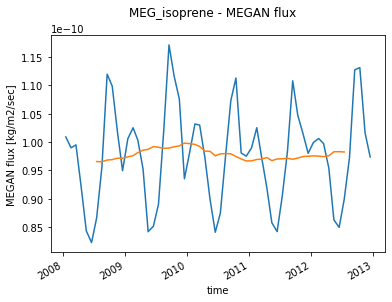

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


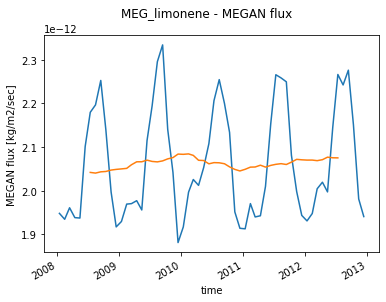

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


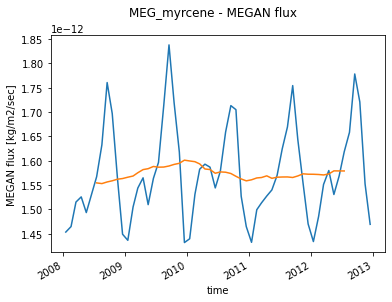

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


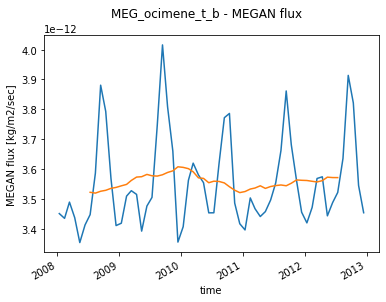

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


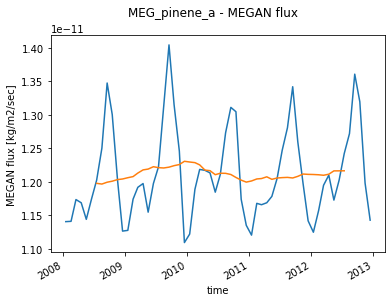

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


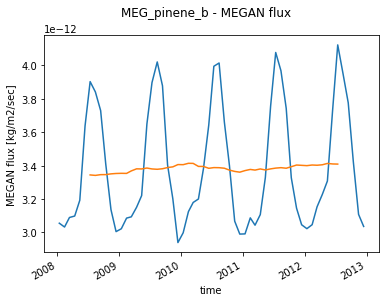

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


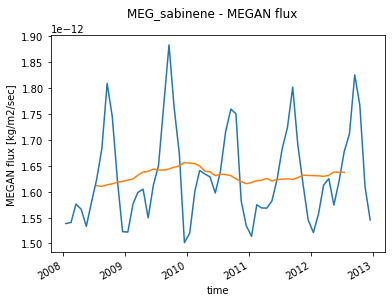

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


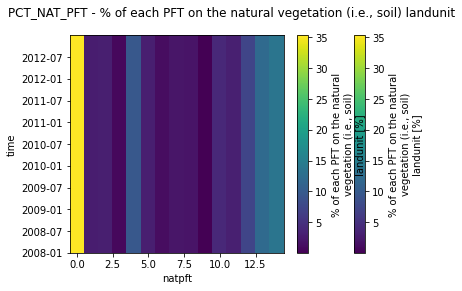

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


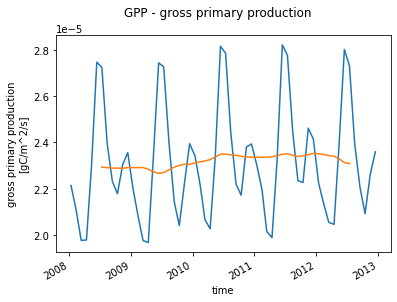

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


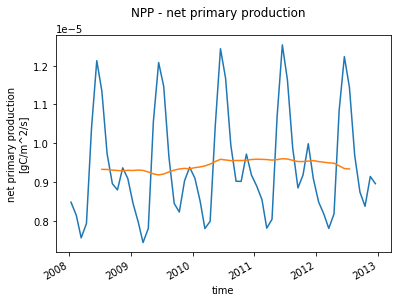

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


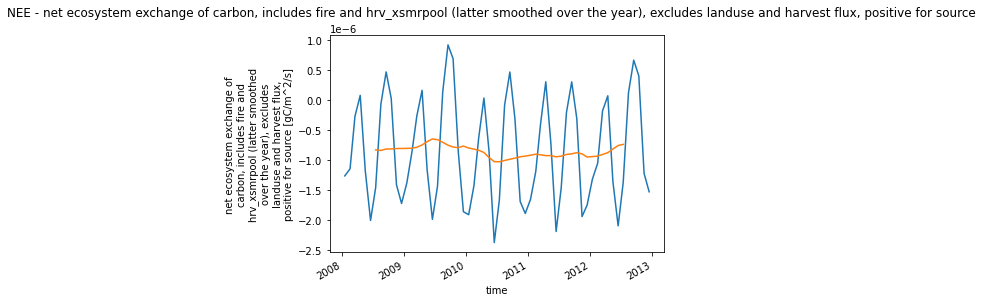

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


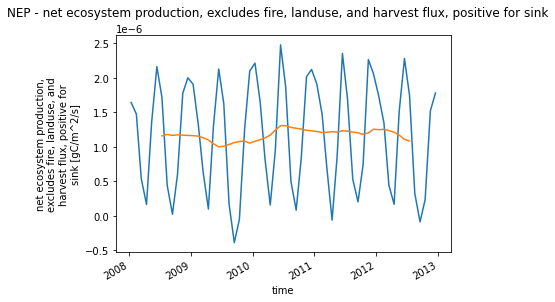

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


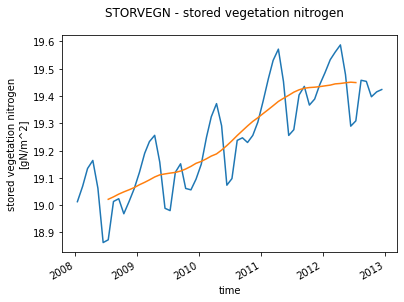

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


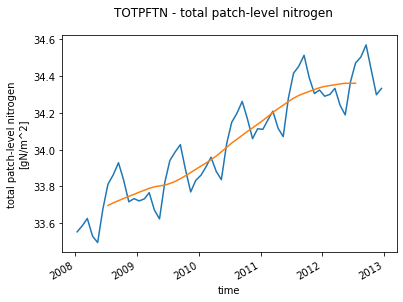

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


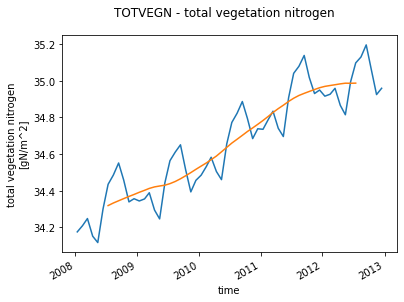

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


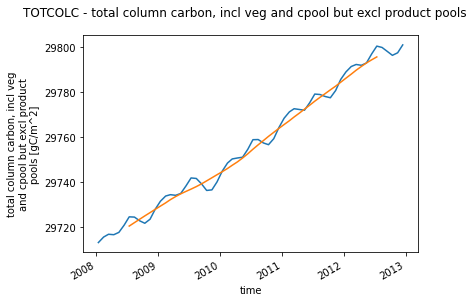

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


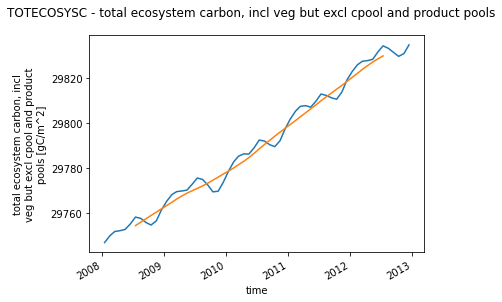

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


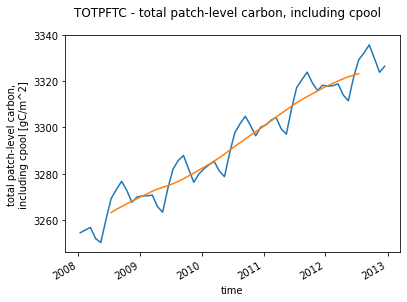

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


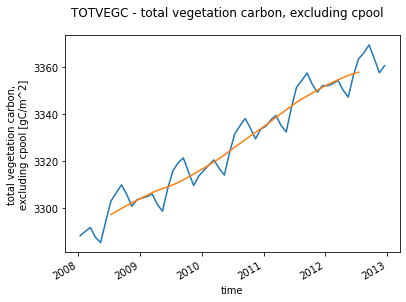

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


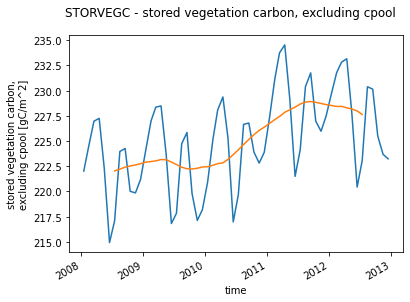

/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/cluster/home/adelez/pyenv/lib64/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


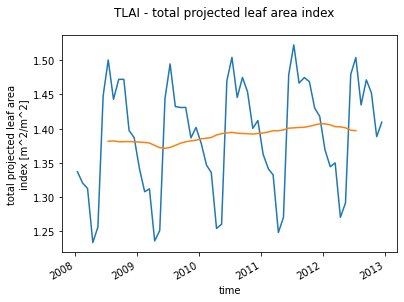

In [10]:
#print_timeseries(ds)
print_timeseries(ds2)

In [12]:
ds3 = fix_names(ds2)
#ds3 = aerosol_cloud_forcing_scomposition_Ghan(ds3)

Fix names completed


In [65]:
ds3

<xarray.Dataset>
Dimensions:           (ilev: 33, lat: 96, lev: 32, lon: 144, nbnd: 2, time: 60)
Coordinates:
  * ilev              (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * lat               (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon               (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lev               (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * time              (time) datetime64[ns] 2008-01-15 2008-02-15 ... 2012-12-15
Dimensions without coordinates: nbnd
Data variables:
    LANDFRAC          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    GRIDAREA          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    gw                (time, lat) float64 dask.array<chunksize=(1, 96), meta=np.ndarray>
    date              (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    time_bnds         (time, nbnd) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    P0                (time) float64 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    hyam              (time, lev) float64 dask.array<chunksize=(1, 32), meta=np.ndarray>
    hybm              (time, lev) float64 dask.array<chunksize=(1, 32), meta=np.ndarray>
    PS                (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    hyai              (time, ilev) float64 dask.array<chunksize=(1, 33), meta=np.ndarray>
    hybi              (time, ilev) float64 dask.array<chunksize=(1, 33), meta=np.ndarray>
    SFisoprene        (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    SFmonoterp        (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    N_AER             (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    DOD550            (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    SOA_A1            (time, lev, lat, lon) float32 1.562e-07 ... 2.743e-05
    SOA_NA            (time, lev, lat, lon) float32 2.586e-08 ... 7.38e-06
    cb_SOA_A1         (time, lat, lon) float32 0.6082 0.6082 ... 0.5138 0.5138
    cb_SOA_NA         (time, lat, lon) float32 0.0126 0.0126 ... 0.008366
    cb_SOA_A1_OCW     (time, lat, lon) float32 0.0004537 0.000455 ... 9.095e-05
    cb_SOA_NA_OCW     (time, lat, lon) float32 4.095e-05 4.092e-05 ... 4.069e-06
    ACTNL             (time, lat, lon) float32 5.183e+11 5.186e+11 ... 2.736e+11
    ACTREL            (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    CDNUMC            (time, lat, lon) float32 0.2626 0.2624 ... 0.1384 0.1385
    CLDHGH            (time, lat, lon) float32 202.2 202.2 202.2 ... 310.0 310.0
    CLDLOW            (time, lat, lon) float32 0.0 0.0 0.0 ... 647.4 646.8 646.8
    CLDMED            (time, lat, lon) float32 324.8 324.8 324.8 ... 223.6 223.6
    CLDTOT            (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    CLDLIQ            (time, lev, lat, lon) float32 3.96e-18 3.96e-18 ... 6.857
    CLOUD             (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    CLOUDCOVER_CLUBB  (time, ilev, lat, lon) float32 dask.array<chunksize=(1, 33, 96, 144), meta=np.ndarray>
    FCTL              (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    LWCF              (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    SWCF              (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    NUMLIQ            (time, lev, lat, lon) float32 dask.array<chunksize=(1, 32, 96, 144), meta=np.ndarray>
    TGCLDLWP          (time, lat, lon) float32 5.592 5.592 5.593 ... 15.12 15.13
    FLNT              (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    FSNT              (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    FLNT_DRF          (time, lat, lon)

In [13]:
save_postprocessed(ds3, comp, processed_path, casealias)

IDEAL-ON_LAND_20082012.nc

Saving completed


In [10]:
#ds_lnd

#area, landfrac, landmask, pftmask, GPP

<xarray.Dataset>
Dimensions:                  (cft: 64, glc_nec: 10, hist_interval: 2, lat: 96, levdcmp: 25, levgrnd: 25, levlak: 10, levsoi: 20, lon: 144, ltype: 9, natpft: 15, nvegwcs: 4, time: 1)
Coordinates:
  * levgrnd                  (levgrnd) float64 0.01 0.04 0.09 ... 28.87 42.0
  * levlak                   (levlak) float64 0.05 0.6 2.1 ... 25.6 34.33 44.77
  * levdcmp                  (levdcmp) float64 0.01 0.04 0.09 ... 28.87 42.0
  * time                     (time) datetime64[ns] 2007-02-01
  * lon                      (lon) float64 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                      (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
Dimensions without coordinates: cft, glc_nec, hist_interval, levsoi, ltype, natpft, nvegwcs
Data variables:
    mcdate                   (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mcsec                    (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mdcur                    (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mscur                    (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    nstep                    (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds              (time, hist_interval) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    date_written             (time) |S16 dask.array<chunksize=(1,), meta=np.ndarray>
    time_written             (time) |S16 dask.array<chunksize=(1,), meta=np.ndarray>
    area                     (lat, lon) float64 dask.array<chunksize=(96, 144), meta=np.ndarray>
    landfrac                 (lat, lon) float64 dask.array<chunksize=(96, 144), meta=np.ndarray>
    landmask                 (lat, lon) float64 dask.array<chunksize=(96, 144), meta=np.ndarray>
    pftmask                  (lat, lon) float64 dask.array<chunksize=(96, 144), meta=np.ndarray>
    nbedrock                 (lat, lon) float64 dask.array<chunksize=(96, 144), meta=np.ndarray>
    ZSOI                     (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    DZSOI                    (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    WATSAT                   (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    SUCSAT                   (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    BSW                      (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    HKSAT                    (levgrnd, lat, lon) float64 dask.array<chunksize=(25, 96, 144), meta=np.ndarray>
    ZLAKE                    (levlak, lat, lon) float64 dask.array<chunksize=(10, 96, 144), meta=np.ndarray>
    DZLAKE                   (levlak, lat, lon) float64 dask.array<chunksize=(10, 96, 144), meta=np.ndarray>
    ACTUAL_IMMOB             (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    AGNPP                    (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    ALT                      (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    ALTMAX                   (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    AR                       (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    ATM_TOPO                 (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    BAF_CROP                 (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    BAF_PEATF                (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    BCDEP                    (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    BGNPP                    (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    BTRAN2                   (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), m

In [5]:
# Fix timestamp of model data
ds = fix_cam_time(ds)

# Remove spinup months of data set
ds = ds.isel(time=slice(12,len(ds.time)))

print("Postprocessing completed")
date = '20082012'

Postprocessing completed


In [6]:
# BVOC variables
variables = ['SFisoprene', 'SFmonoterp']
ds[variables].to_netcdf(processed_path+casealias+'_'+'BVOC_'+date+'.nc')

In [7]:
"""Av = 6.022e23  # Avogadro's number
M_iso = 68.114200e-3  # Molar mass isoprene kg/mol
M_mono = 136.228400e-3  # Molar mass monoterpene kg/mol
path_this_file = str(pathlib.Path().absolute())

var_dic = dict(SFmonoterp='H10H16',
            SFisoprene='ISOP')
M_dic = dict(SFmonoterp=M_mono,
            SFisoprene=M_iso)"""

"Av = 6.022e23  # Avogadro's number\nM_iso = 68.114200e-3  # Molar mass isoprene kg/mol\nM_mono = 136.228400e-3  # Molar mass monoterpene kg/mol\npath_this_file = str(pathlib.Path().absolute())\n\nvar_dic = dict(SFmonoterp='H10H16',\n            SFisoprene='ISOP')\nM_dic = dict(SFmonoterp=M_mono,\n            SFisoprene=M_iso)"

In [7]:
# SOA variables
variables = ['N_AER', 'DOD550', 'SOA_A1','SOA_NA','cb_SOA_A1','cb_SOA_NA', 'cb_SOA_A1_OCW', 'cb_SOA_NA_OCW']
ds[variables].to_netcdf(processed_path+casealias+'_'+'SOA_'+date+'.nc')

In [9]:
# CLOUD PROPERTIES
variables = ['ACTNL', 'ACTREL','CDNUMC', 'CLDHGH', 'CLDLOW', 'CLDMED', 'CLDTOT', 'CLDLIQ', 
             'CLOUD', 'CLOUDCOVER_CLUBB', 'FCTL', 'NUMLIQ', 'TGCLDLWP']
ds[variables].to_netcdf(processed_path+casealias+'_'+'CLOUDPROP_'+date+'.nc')

In [10]:
# RADIATIVE COMPONENTS
variables = ['FLNT', 'FSNT', 'FLNT_DRF', 'FLNTCDRF', 'FSNTCDRF', 'FSNT_DRF','LWCF', 'SWCF', 'LHFLX', 'SHFLX']

xr_ds = ds.copy()
xr_ds = xr_ds[variables]


for var in ['SWDIR_Ghan', 'LWDIR_Ghan', 'DIR_Ghan', 'SWCF_Ghan', 'LWCF_Ghan', 'NCFT_Ghan', 'SW_rest_Ghan', 'LW_rest_Ghan']:
    
    if ('SWDIR_Ghan' == var):# or ('DIR_Ghan' == var):
        xr_ds['SWDIR_Ghan'] = xr_ds['FSNT'] - xr_ds['FSNT_DRF']
        xr_ds['SWDIR_Ghan'].attrs['units'] = xr_ds['FSNT_DRF'].attrs['units']
    if ('LWDIR_Ghan' == var):# or ('DIR_Ghan' == var):
        xr_ds['LWDIR_Ghan'] = -(xr_ds['FLNT'] - xr_ds['FLNT_DRF'])
        xr_ds['LWDIR_Ghan'].attrs['units'] = xr_ds['FLNT_DRF'].attrs['units']
    if 'DIR_Ghan' == var:
        xr_ds['DIR_Ghan'] = xr_ds['LWDIR_Ghan'] + xr_ds['SWDIR_Ghan']
        xr_ds['DIR_Ghan'].attrs['units'] = xr_ds['LWDIR_Ghan'].attrs['units']
    if 'SWCF_Ghan' == var:
        xr_ds['SWCF_Ghan'] = xr_ds['FSNT_DRF'] - xr_ds['FSNTCDRF']
        xr_ds[var].attrs['units'] = xr_ds['FSNT_DRF'].attrs['units']
    if 'LWCF_Ghan' == var:
        xr_ds[var] = -(xr_ds['FLNT_DRF'] - xr_ds['FLNTCDRF'])
        xr_ds[var].attrs['units'] = xr_ds['FLNT_DRF'].attrs['units']
    if 'NCFT_Ghan' == var:
        xr_ds[var] = xr_ds['FSNT_DRF'] - xr_ds['FSNTCDRF'] - (xr_ds['FLNT_DRF'] - xr_ds['FLNTCDRF'])
        xr_ds[var].attrs['units'] = xr_ds['FLNT_DRF'].attrs['units']
    if 'SW_rest_Ghan' == var:
        xr_ds[var] = xr_ds['FSNTCDRF']
    elif 'LW_rest_Ghan' == var:
        xr_ds[var] = xr_ds['FLNTCDRF']
    
xr_ds.to_netcdf(processed_path+casealias+'_'+'RADIATIVE_'+date+'.nc')

In [11]:
# TURBULENT FLUXES
variables = ['LHFLX', 'OMEGAT', 'SHFLX']
ds[variables].to_netcdf(processed_path+casealias+'_'+'TURBFLUXES_'+date+'.nc')

In [27]:
def variables_by_comp(comp):
    """Return dict of selected variables per cathegory given the respective component"""

    if comp == 'atm':

        variables = \
            {'BVOC': ['SFisoprene', 'SFmonoterp'],
             'SOA': ['N_AER', 'DOD550', 'SOA_A1','SOA_NA','cb_SOA_A1','cb_SOA_NA', 'cb_SOA_A1_OCW', 'cb_SOA_NA_OCW'],
             'CLOUDPROP': ['ACTNL', 'ACTREL','CDNUMC', 'CLDHGH', 'CLDLOW', 'CLDMED', 'CLDTOT', 'CLDLIQ', 'CLOUD', 
                           'CLOUDCOVER_CLUBB', 'FCTL', 'LWCF', 'SWCF', 'NUMLIQ', 'TGCLDLWP'],
             'RADIATIVE': ['FLNT', 'FSNT', 'FLNT_DRF', 'FLNTCDRF', 'FSNTCDRF', 'FSNT_DRF'],
             'TURBFLUXES': ['LHFLX', 'SHFLX'], #, 'OMEGAT'
             }

    elif comp =='lnd':

        lnd_vars = ['PCT_NAT_PFT','GPP', 'NPP', 'NEE', 'NEP', 'STORVEGN', 'TOTPFTN', 'TOTVEGN',
                'TOTCOLC', 'TOTECOSYSC', 'TOTPFTC', 'TOTVEGC', 'STORVEGC','TLAI']

        if casename.find('OFF')<0.:
            variables = {'LAND': ['MEG_isoprene', 'MEG_limonene', 'MEG_myrcene', 'MEG_ocimene_t_b', 
                                  'MEG_pinene_a', 'MEG_pinene_b', 'MEG_sabinene'] + lnd_vars}
        else:
            variables = {'LAND': lnd_vars}
            
    return variables



def create_dataset(raw_path, casename, comp, history_field='h0', full_dset = False, 
                   fix_timestamp = 'datetime64', spinup_months = 12, pressure_vars=False):
    """Given a list of raw netcdf files, convert them into a Xarray Dataset with merged time
    Args:
    - raw_path (string): path to the dictory with the files
    - casename (string): case name to identify the files
    - comp (string): component to analyse ('atm' or 'lnd')
    - history_field (string): code for the history files type. Default:'h0' (main - monthly)
    - full_dset (bool): return full dataset with no variable selection, else a variable selection will be performed by component. Default: False
    - fix_timestamp (string): fix dates in h0 raw files (shifted of one month). 
    Value of fix_timestamp passed as timetype in fix_cam_time. If no fixing pass None. Default: 'datetime64'.
    - spinup_months (int): number of month to neglect because of spin up. Dafault: 12
    - pressure_vars (bool): include pressure variables ('P0', 'hyam', 'hybm', 'PS', 'hyai', 'hybi', 'ilev'). Default: False
    
    Return:
    - xarray Dataset 
    """
    #import netCDF4
    import glob #return all file paths that match a specific pattern

    import sys; sys.path.append("..")
    from dataset_manipulation import fix_cam_time

    # Set model name by comp
    if comp == 'atm': model = 'cam'
    elif comp == 'lnd': model = 'clm2'
    else: raise ValueError("component not supported. Choose 'atm' or 'lnd'")
    
    # Import all dataset   
    fp = raw_path+casename+'/'+comp+'/hist/'+casename+'.'+model+'.'+history_field+'.*.nc'

    all_files = glob.glob(fp)
    all_files.sort()
    print("Files found")

    ds = xr.open_mfdataset(all_files)
    print("Dataset created")
    
    # Fix timestamp of model data
    if fix_timestamp and history_field == 'h0': ds = fix_cam_time(ds, timetype = fix_timestamp)

    # Remove spinup months of data set
    ds = ds.isel(time=slice(spinup_months,len(ds.time)))
    print("Postprocessing completed")
    
    if full_dset: 
        return ds
    
    else: 
        # Select variables
        variables = ['LANDFRAC', 'GRIDAREA', 'gw', 'date', 'time_bnds']
        if comp == 'lnd': variables = variables + ['area', 'landfrac', 'landmask', 'pftmask', 'PCT_LANDUNIT']
        if comp == 'atm' and pressure_vars: variables = variables + ['P0', 'hyam', 'hybm', 'PS', 'hyai', 'hybi', 'ilev']
            
        variables = variables + sum([*variables_by_comp(comp).values()], []) # from dict to flat list
        
        return ds[variables]
    
    
def fix_units(ds):
    """ Convert some units to have a more meaningful representation """
    
    ds_ = ds.copy(deep=True)
    
    for var in list(ds_.keys()):
        
        if var == "SFisoprene" or var == "SFmonoterp":
            ds_[var].values = ds_[var].values*1e+6*(60*60*24*365) # Change unit from kg/m2/s to mg/m2/y
            ds_[var].attrs["units"] = "mg/m$^2$/y"
            
        if var == "SOA_A1" or var == "SOA_NA":
            ds_[var].values = ds_[var].values*1e+9 # Change unit from kg/kg to $\mu$g/kg
            ds_[var].attrs["units"] = "$\mu$g/kg"
            
        if var == "cb_SOA_A1" or var == "cb_SOA_NA" or var == "cb_SOA_A1_OCW" or var == "cb_SOA_NA_OCW":
            ds_[var].values = ds_[var].values*1e+6 # Change unit from kg/m2 to $\mu$g/m2
            ds_[var].attrs["units"] = "mg/m$^2$"
            
        if var == "ACTNL":
            ds_[var].values = ds_[var].values*1e+6 # Change unit from m-3 to cm-3
            ds_[var].attrs["units"] = "cm$^{-3}$"
            
        if var == "CDNUMC":
            ds_[var].values = ds_[var].values*1e-10 # Change unit from 1/m2 to 1e6 cm-2
            ds_[var].attrs["units"] = "1e6 cm$^{-2}$"
            
        if var == "CLDHGH" or var == "CLDLOW" or var == "CLDMED" or var == "CLDMED":
            ds_[var].values = ds_[var].values*1e+3 # Change unit from fraction to g/kg
            ds_[var].attrs["units"] = "g/kg"
            
        if var == "CLDLIQ":
            ds_[var].values = ds_[var].values*1e+6 # Change unit from kg/kg to mg/kg
            ds_[var].attrs["units"] = "mg/kg"
            
        if var == "TGCLDLWP":
            ds_[var].values = ds_[var].values*1e+3 # Change unit from kg/m2 to g/m2
            ds_[var].attrs["units"] = "g/m$^2$"
            
        if var == "FLNT" or var == "FSNT" or var == "FLNT_DRF" or var == "FLNTCDRF" or var == "FSNT_DRF" or var == "FSNTCDRF" or var =="LHFLX" or var =="SHFLX":
            ds_[var].attrs["units"] = "W/m$^2$" # Change unit from W/m^2 to W/m2, like the other radiative fluxes
            
    return ds_


def fix_names(ds):
    """Assign clearer and more meaningful names"""
    
    ds_ = ds.copy(deep=True)
    
    for var in list(ds_.keys()):
        
        if var == "SOA_A1":
            ds_[var].attrs["long_name"] = "SOA_A1 concentration - SOA condensate on existing particles from SOAGSV (gas)"
        if var == "SOA_NA":
            ds_[var].attrs["long_name"] = "SOA_NA concentration - SOA formed by co-nucleation with SO4"
        if var == "cb_SOA_A1":
            ds_[var].attrs["long_name"] = "SOA_A1 burden column - SOA condensate on existing particles from SOAGSV (gas)"
        if var == "cb_SOA_NA":
            ds_[var].attrs["long_name"] = "SOA_NA burden column - SOA formed by co-nucleation with SO4"
        if var == "cb_SOA_A1_OCW":
            ds_[var].attrs["long_name"] = "SOA_A1 burden column in cloud water - SOA condensate on existing particles from SOAGSV (gas)"
        if var == "cb_SOA_NA_OCW":
            ds_[var].attrs["long_name"] = "SOA_NA burden column in cloud water - SOA formed by co-nucleation with SO4"
        
        if var == "TGCLDLWP":
            ds_[var].rename('LWP')
            ds_[var].assign_attrs["CLM5_name"] = 'TGCLDLWP'
            
        """
        if var == "FSNT":
            ds_[var].rename('SWTOT')
            ds_[var].assign_attrs["CLM5_name"] = "FSNT"
        if var == "FLNT":
            ds_[var].rename('LWTOT')
            ds_[var].assign_attrs["CLM5_name"] = "FLNT"
        if var == "FSNT_DRF":
            ds_[var].rename('SW_clean')
            ds_[var].assign_attrs["CLM5_name"] = "FSNT_DRF"
        if var == "FSNTCDRF":
            ds_[var].rename('SW_clean_clear')
            ds_[var].assign_attrs["CLM5_name"] = "FSNTCDRF"
        if var == "FLNT_DRF":
            ds_[var].rename('LW_clean')
            ds_[var].assign_attrs["CLM5_name"] = "FLNT_DRF"
        if var == "FLNTCDRF":
            ds_[var].rename('LW_clean_clear')
            ds_[var].assign_attrs["CLM5_name"] = "FLNTCDRF"
            """
            
    return ds_

def aerosol_cloud_forcing_scomposition_Ghan(ds):
    # Author: Sara Marie Blichner
    
    """Apply Ghan's scomposition of the aerosol-cloud radiative forcing: 
    https://acp.copernicus.org/articles/13/9971/2013/acp-13-9971-2013.pdf"""
    
    ds_ = ds.copy(deep=True)
    
    Ghan_vars = ['SWDIR', 'LWDIR', 'DIR', 'SWCF', 'LWCF', 'NCFT', 'SW_rest', 'LW_rest']
    
    for var in Ghan_vars:
        
    
        if 'SWDIR' == var:
            ds_[var] = ds_['FSNT'] - ds_['FSNT_DRF']
            ds_[var].attrs['units'] = ds_['FSNT_DRF'].attrs['units']
            ds_[var].attrs['long_name'] = "Shortwave aerosol direct radiative forcing - Ghan's scomposition"

        if 'LWDIR' == var:
            ds_[var] = -(ds_['FLNT'] - ds_['FLNT_DRF'])
            ds_[var].attrs['units'] = ds_['FLNT_DRF'].attrs['units']
            ds_[var].attrs['long_name'] = "Longwave aerosol direct radiative forcing - Ghan's scomposition"


        if 'DIR' == var:
            ds_[var] = ds_['LWDIR_Ghan'] + ds_['SWDIR_Ghan']
            ds_[var].attrs['units'] = ds_['LWDIR_Ghan'].attrs['units']
            ds_[var].attrs['long_name'] = "Net aerosol direct radiative forcing - Ghan's scomposition"


        if 'SWCF' == var: # this will overwrite the existing one
            ds_[var] = ds_['FSNT_DRF'] - ds_['FSNTCDRF']
            ds_[var].attrs['units'] = ds_['FSNT_DRF'].attrs['units']
            ds_[var].attrs['long_name'] = "Shortwave cloud radiative forcing - Ghan's scomposition"


        if 'LWCF' == var: # this will overwrite the existing one
            ds_[var] = -(ds_['FLNT_DRF'] - ds_['FLNTCDRF'])
            ds_[var].attrs['units'] = ds_['FLNT_DRF'].attrs['units']
            ds_[var].attrs['long_name'] = "Longwave cloud radiative forcing - Ghan's scomposition"


        if 'NCFT' == var:
            ds_[var] = ds_['FSNT_DRF'] - ds_['FSNTCDRF'] - (ds_['FLNT_DRF'] - ds_['FLNTCDRF'])
            ds_[var].attrs['units'] = ds_['FLNT_DRF'].attrs['units']
            ds_[var].attrs['long_name'] = "Net cloud radiative forcing - Ghan's scomposition"


        if 'SW_rest' == var:
            ds_[var] = ds_['FSNTCDRF']
            ds_[var].attrs['long_name'] = "Shortwave surface albedo radiative forcing - Ghan's scomposition"


        elif 'LW_rest' == var:
            ds_[var] = ds_['FLNTCDRF']
            ds_[var].attrs['long_name'] = "Clear sky total column longwave flux - Ghan's scomposition"
            
    # Add attributes based on Ghan scomposition
    
    for var in list(ds_.keys()):
        
        if var == "FSNT":
            ds_[var].assign_attrs["Ghan_name"] = 'SWTOT'
        if var == "FLNT":
            ds_[var].assign_attrs["Ghan_name"] = 'LWTOT'
        if var == "FSNT_DRF":
            ds_[var].assign_attrs["Ghan_name"] = 'SW_clean'
            ds_[var].assign_attrs["Ghan_long_name"] = 'Shortwave without direct aerosol forcing (scattering, absorbing)'
        if var == "FSNTCDRF":
            ds_[var].assign_attrs["Ghan_name"] = 'SW_clean_clear'
            ds_[var].assign_attrs["Ghan_long_name"] = 'Shortwave without direct aerosol and cloud forcing'
        if var == "FLNT_DRF":
            ds_[var].assign_attrs["Ghan_name"] = 'LW_clean'
            ds_[var].assign_attrs["Ghan_long_name"] = 'Longwave without direct aerosol forcing (scattering, absorbing)'
        if var == "FLNTCDRF":
            ds_[var].assign_attrs["Ghan_name"] = 'LW_clean_clear'
            ds_[var].assign_attrs["Ghan_long_name"] = 'Longwave without direct aerosol and cloud forcing'

    return ds_

In [9]:
import glob
import xarray as xr
from datetime import datetime

# List all matching files
fns = 'VEG_SHIFT_IDEAL_2000_sec_nudg_f19_f19.cam.h0.*.nc'
files = glob.glob(fn_path+fns)

# Create list for 
individual_files = []

# Loop through each file in the list
for i in files:
    
    # Load a single dataset
    #timestep_ds = xr.open_dataset(i)
    timestep_ds = xr.open_mfdataset(i)
    
    # Create a new variable called 'time' from the `time_coverage_start` field, and 
    # convert the string to a datetime object so xarray knows it is time data
    timestep_ds['time'] = datetime.strptime(timestep_ds.time_coverage_start, 
                                           "%Y-%m-%dT%H:%M:%S.%fZ")
    
    # Add the dataset to the list
    individual_files.append(timestep_ds)

# Combine individual datasets into a single xarray along the 'time' dimension
modis_ds = xr.concat(individual_files, dim='time')

print(modis_ds)

ModuleNotFoundError: No module named 'dask'